In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/Acer/Documents/Neural_Ocean/Datasets/CSV_Datasets/Good_Dataset.csv')

In [3]:
df.drop(['Index'], axis=1, inplace=True)

In [4]:
df.shape

(5956842, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   pH                      float64
 1   Iron                    float64
 2   Nitrate                 float64
 3   Chloride                float64
 4   Lead                    float64
 5   Zinc                    float64
 6   Color                   object 
 7   Turbidity               float64
 8   Fluoride                float64
 9   Copper                  float64
 10  Odor                    float64
 11  Sulfate                 float64
 12  Conductivity            float64
 13  Chlorine                float64
 14  Manganese               float64
 15  Total Dissolved Solids  float64
 16  Source                  object 
 17  Water Temperature       float64
 18  Air Temperature         float64
 19  Month                   object 
 20  Day                     float64
 21  Time of Day             float64

In [6]:
df.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,5.840788e+06,5.917089e+06,5.851117e+06,5.781311e+06,5.929933e+06,5.800716e+06,5.907027e+06,5.767686e+06,5.757440e+06,5.777951e+06,5.759424e+06,5.792981e+06,5.899017e+06,5.847259e+06,5.955172e+06,5.788609e+06,5.927114e+06,5.857239e+06,5.842323e+06,5.956842e+06
mean,7.445373e+00,1.279027e-01,6.169970e+00,1.842970e+02,1.498336e-03,1.550255e+00,5.215093e-01,9.644315e-01,5.161216e-01,1.803459e+00,1.460764e+02,4.249974e+02,3.255738e+00,1.092802e-01,2.671454e+02,1.912982e+01,6.000324e+01,1.573227e+01,1.150404e+01,3.030552e-01
std,8.881665e-01,4.799915e-01,3.256667e+00,6.842828e+01,3.250641e-02,1.546368e+00,9.258807e-01,8.247870e-01,5.965534e-01,1.069586e+00,6.879844e+01,1.899937e+02,7.328441e-01,4.761827e-01,1.558586e+02,1.136623e+01,1.809977e+01,8.794391e+00,6.922858e+00,4.595789e-01
min,1.057113e+00,2.047587e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,1.100007e-02,1.194073e+01,1.059998e+01,9.019921e-01,4.793505e-55,1.048902e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.894328e+00,9.992949e-06,3.973078e+00,1.381341e+02,1.500283e-122,4.148202e-01,3.872368e-02,3.749503e-01,1.288629e-01,8.921019e-01,9.777114e+01,2.864261e+02,2.744504e+00,2.522376e-06,1.329157e+02,1.134879e+01,4.779120e+01,8.000000e+00,6.000000e+00,0.000000e+00
50%,7.449564e+00,2.249640e-03,5.604051e+00,1.760178e+02,2.213625e-62,1.081818e+00,2.097680e-01,7.751792e-01,3.479592e-01,1.774284e+00,1.346489e+02,3.970808e+02,3.209748e+00,6.481943e-04,2.658880e+02,1.644428e+01,5.999681e+01,1.600000e+01,1.200000e+01,0.000000e+00
75%,8.014424e+00,5.455290e-02,7.672402e+00,2.179811e+02,3.592165e-27,2.230841e+00,6.249132e-01,1.341508e+00,7.010104e-01,2.654286e+00,1.817703e+02,5.333489e+02,3.705217e+00,1.672082e-02,3.984954e+02,2.383543e+01,7.221235e+01,2.300000e+01,1.800000e+01,1.000000e+00
max,1.291072e+01,1.935315e+01,9.639078e+01,1.507310e+03,5.844281e+00,2.836867e+01,2.371527e+01,1.464625e+01,1.207482e+01,4.141998e+00,1.434587e+03,2.271632e+03,1.256663e+01,2.374086e+01,5.797999e+02,2.973086e+02,1.521237e+02,3.100000e+01,2.300000e+01,1.000000e+00


In [7]:
df.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [8]:
df.corr()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
pH,1.000000,-0.009897,-0.009683,-0.012628,-0.002375,-0.005146,-0.013587,-0.010215,-0.013522,-0.009519,-0.007325,0.000355,-0.007743,-0.011257,-0.005277,-0.000413,0.000514,0.000848,-0.000166,-0.034851
Iron,-0.009897,1.000000,0.052052,0.064423,0.011031,0.025540,0.069708,0.052599,0.068354,0.050585,0.040852,0.000216,0.045371,0.059357,0.028472,0.001019,-0.000363,-0.000157,0.000341,0.180886
Nitrate,-0.009683,0.052052,1.000000,0.064688,0.011570,0.025269,0.070877,0.052887,0.067683,0.050447,0.039948,0.000065,0.045539,0.058954,0.029180,-0.000172,0.000216,-0.000239,0.000041,0.183366
Chloride,-0.012628,0.064423,0.064688,1.000000,0.014110,0.031077,0.086460,0.064958,0.082740,0.062617,0.048834,-0.000619,0.055794,0.071302,0.036500,-0.000348,-0.000379,0.000120,-0.000354,0.223110
Lead,-0.002375,0.011031,0.011570,0.014110,1.000000,0.005868,0.016437,0.013300,0.015627,0.011386,0.009115,-0.000115,0.010660,0.013470,0.005895,-0.000048,-0.000502,0.000137,0.000673,0.042072
Zinc,-0.005146,0.025540,0.025269,0.031077,0.005868,1.000000,0.034267,0.024763,0.032861,0.024876,0.019655,-0.000130,0.021845,0.027630,0.013944,-0.000224,0.000049,0.000216,0.000792,0.088469
Turbidity,-0.013587,0.069708,0.070877,0.086460,0.016437,0.034267,1.000000,0.070282,0.090030,0.067134,0.053347,-0.000115,0.062349,0.077102,0.039046,0.000261,-0.000830,-0.000293,-0.001011,0.244509
Fluoride,-0.010215,0.052599,0.052887,0.064958,0.013300,0.024763,0.070282,1.000000,0.068601,0.050655,0.040674,-0.000316,0.047046,0.057748,0.030026,-0.000567,0.000131,0.000742,-0.000797,0.184069
Copper,-0.013522,0.068354,0.067683,0.082740,0.015627,0.032861,0.090030,0.068601,1.000000,0.064463,0.050877,-0.000029,0.058540,0.074265,0.037493,-0.000517,0.000502,0.000463,-0.000092,0.234349
Odor,-0.009519,0.050585,0.050447,0.062617,0.011386,0.024876,0.067134,0.050655,0.064463,1.000000,0.038374,0.000122,0.044910,0.056263,0.028050,0.000038,0.000028,-0.000321,0.000155,0.175300


In [ ]:
train_df = df.drop(['Conductivity','Water Temperature','Air Temperature','Day','Time of Day'], axis=1)

In [ ]:
train_df.shape

(5956842, 18)

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
def cramers_v(table):
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Carmer V test on color column


In [ ]:
contingency_table = pd.crosstab(train_df['Color'], train_df['Target'])

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
V = cramers_v(contingency_table)

In [ ]:
print("Chi-squared test statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p))
print("Cramér's V statistic: {:.4f}".format(V))

Chi-squared test statistic: 676947.36
P-value: 0.0000
Cramér's V statistic: 0.3373


Carmer V test on source column

In [ ]:
contingency_table = pd.crosstab(train_df['Source'], train_df['Target'])

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
V = cramers_v(contingency_table)

In [ ]:
print("Chi-squared test statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p))
print("Cramér's V statistic: {:.4f}".format(V))

Chi-squared test statistic: 10.03
P-value: 0.1870
Cramér's V statistic: 0.0007


Carmer V test on month column


In [ ]:
contingency_table = pd.crosstab(train_df['Month'], train_df['Target'])

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
V = cramers_v(contingency_table)

In [ ]:
print("Chi-squared test statistic: {:.2f}".format(chi2))
print("P-value: {:.4f}".format(p))
print("Cramér's V statistic: {:.4f}".format(V))

Chi-squared test statistic: 13.00
P-value: 0.2932
Cramér's V statistic: 0.0006


In [ ]:
train_v2_df = train_df.drop(['Source','Month'], axis=1)

In [ ]:
train_v2_df.info()

In [9]:
from pycaret.classification import *

In [10]:
ego = setup(data=df, target='Target', use_gpu = True)

,Description,Value
0,Session id,7431
1,Target,Target
2,Target type,Binary
3,Original data shape,"(5956842, 23)"
4,Transformed data shape,"(5956842, 45)"
5,Transformed train set shape,"(4169789, 45)"
6,Transformed test set shape,"(1787053, 45)"
7,Numeric features,19
8,Categorical features,3
9,Rows with missing values,33.2%


In [ ]:
xg = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8650,0.9174,0.8835,0.7286,0.7986,0.6985,0.7058
1,0.8624,0.9161,0.8779,0.7257,0.7946,0.6926,0.6997
2,0.8641,0.9168,0.8800,0.7281,0.7969,0.6961,0.7031
3,0.8646,0.9173,0.8802,0.7291,0.7975,0.6971,0.7041
4,0.8648,0.9175,0.8824,0.7287,0.7982,0.6980,0.7052
5,0.8652,0.9174,0.8849,0.7285,0.7991,0.6991,0.7066
6,0.8644,0.9169,0.8819,0.7282,0.7977,0.6971,0.7044
7,0.8648,0.9176,0.8813,0.7291,0.7980,0.6978,0.7049
8,0.8652,0.9179,0.8819,0.7296,0.7986,0.6986,0.7057


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
save_model(xg, "xgboost")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pH', 'Iron', 'Nitrate',
                                              'Chloride', 'Lead', 'Zinc',
                                              'Turbidity', 'Fluoride', 'Copper',
                                              'Odor', 'Sulfate', 'Conductivity',
                                              'Chlorine', 'Manganese',
                                              'Total Dissolved Solids',
                                              'Water Temperature',
                                              'Air Temperature', 'Day',
                                              'Time of Day'],
                                     transformer=SimpleIm...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate

In [11]:
xg = load_model("C:/Users/Acer/Documents/Neural_Ocean/Weekly_Results/Results_29-04-23_6M_CSV_Dataset/xgboost_with_no_index")

Transformation Pipeline and Model Successfully Loaded


In [13]:
print(xg)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pH', 'Iron', 'Nitrate',
                                             'Chloride', 'Lead', 'Zinc',
                                             'Turbidity', 'Fluoride', 'Copper',
                                             'Odor', 'Sulfate', 'Conductivity',
                                             'Chlorine', 'Manganese',
                                             'Total Dissolved Solids',
                                             'Water Temperature',
                                             'Air Temperature', 'Day',
                                             'Time of Day'],
                                    transformer=SimpleIm...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
        

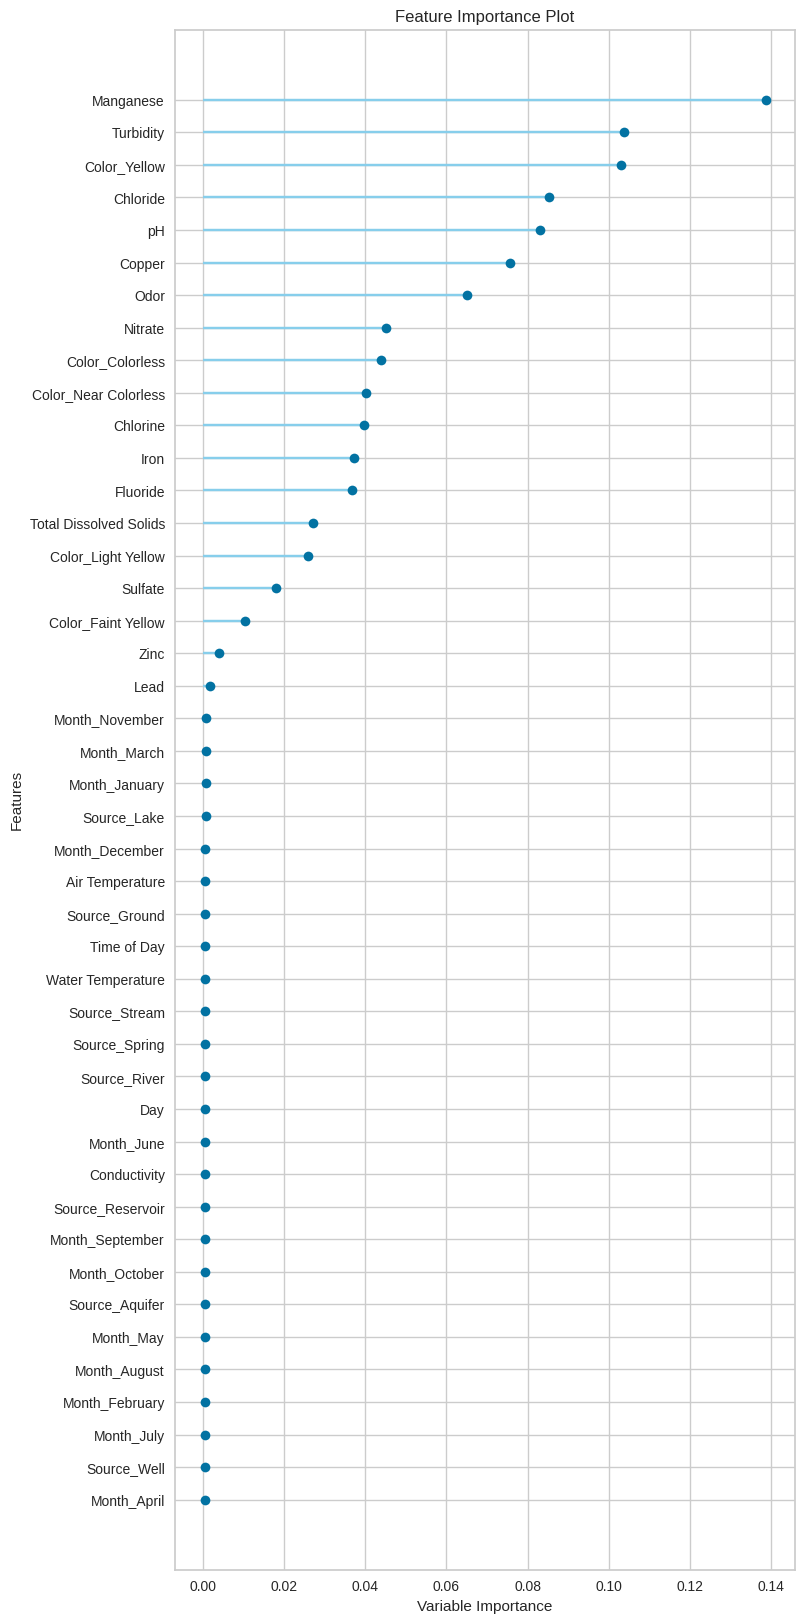

In [ ]:
plot_model(xg, plot= 'feature_all')

In [14]:
create_app(xg)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
